In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
df = pd.read_csv('C:/Users/lgrodrigues/Documents/Projeto Final/Projeto-Final---Grupo-4/Dataset/advertising_tratado.csv', delimiter=',')
print(df)

#Split Treino e Teste
X = df[['Daily Time Spent on Site','Age', 'Area Income','Daily Internet Usage']]
y = df['Clicked on Ad']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)

#Standard MinMax

pipe_features_mm = Pipeline([('scaler', MinMaxScaler())])
colunas_num = X_train.columns
pre_processador = ColumnTransformer(
    transformers=[
        ("pre_process", pipe_features_mm, colunas_num)
    ]
)




In [6]:
#Buscar os melhores hiperparêmtros
pipe_models = Pipeline([
    ('pre_processador', pre_processador),
    ('classifier', LogisticRegression())
])

#Busca do melhor modelo
param_grid = [
    {'classifier__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],

    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],#termo de regularização impõe penalidades sobre os coeficientes do modelo para evitar overfitting (C grande menos regularização, se ajustará mais ao treinamento, C menor --> grande regularização)


    'classifier__penalty': ['l1', 'l2', 'elasticnet'],#Penalidade, é responsável por ajustar o modelo aos dados de treinamento


    }
]

stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#Cria o objeto de busca

grid_search = GridSearchCV(pipe_models, param_grid, cv=stratified_cv, scoring=['precision', 'accuracy', 'f1', 'recall', 'roc_auc' ], refit = 'f1')
#treina o modelo
grid_search.fit(X_train, y_train)

#salva os melhores parâmetros
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

#Predição considerando o melhor modelo
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


c:\Users\lgrodrigues\Documents\Projeto Final\Projeto-Final---Grupo-4\projetofinal\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
300 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lgrodrigues\Documents\Projeto Final\Projeto-Final---Grupo-4\projetofinal\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lgrodrigues\Documents\Projeto Final\Projeto-Final---Grupo-4\projetofinal\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwar

In [7]:
# Avaliando métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Melhores hiperparâmetros:", best_params)
print("Acurácia no conjunto de teste:", accuracy)
print('Precisão no conjunto de teste:', precision)
print('F1 no conjunto de teste:', f1)
print('Recall no conjunto de teste:', recall)
print('ROC_AUC no conjunto de teste:', roc_auc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Melhores hiperparâmetros: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}
Acurácia no conjunto de teste: 0.7797381900967558
Precisão no conjunto de teste: 0.7808855403034369
F1 no conjunto de teste: 0.8301514154048716
Recall no conjunto de teste: 0.8860522309403911
ROC_AUC no conjunto de teste: 0.7506208227386385

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.62      0.69      5517
           1       0.78      0.89      0.83      8539

    accuracy                           0.78     14056
   macro avg       0.78      0.75      0.76     14056
weighted avg       0.78      0.78      0.77     14056



In [8]:
#métricas do  treino
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)

# Imprima os resultados para o treinamento
print("Acurácia no conjunto de treinamento:", accuracy_train)
print('Precisão no conjunto de treinamento:', precision_train)
print('Recall no conjunto de treinamento:', recall_train)
print('F1 no conjunto de treinamento:', f1_train)
print('ROC AUC no conjunto de treinamento:', roc_auc_train)


Acurácia no conjunto de treinamento: 0.7844539309854145
Precisão no conjunto de treinamento: 0.7854145077720207
Recall no conjunto de treinamento: 0.8877078941204029
F1 no conjunto de treinamento: 0.8334341323949856
ROC AUC no conjunto de treinamento: 0.7561840177507941


[[3394 2123]
 [ 973 7566]]


FileNotFoundError: [Errno 2] No such file or directory: 'Modelo de Machine Learning/MatrizConfusaoTesteHiperparametro.png'

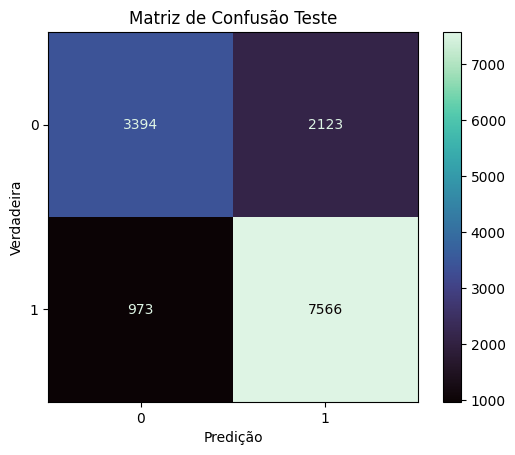

In [11]:
#Matriz de confusão teste
print(confusion_matrix(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = 'mako' )
plt.title('Matriz de Confusão Teste')
plt.xlabel('Predição')
plt.ylabel('Verdadeira')
plt.grid(False)
plt.savefig('Modelo de Machine Learning/MatrizConfusaoTesteHiperparametro.png')
plt.show()


print(classification_report(y_test, y_pred))



In [ ]:
#matriz de confusão treino
print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, cmap = 'mako')
plt.title('Matriz de Confusão Treino')
plt.xlabel('Predição')
plt.ylabel('Verdadeira')
plt.grid(False)
plt.savefig('Modelo de Machine Learning/MatrizConfusaoTreino_hiperparãmetros.png')
plt.show()

print(classification_report(y_train, y_pred_train))

In [ ]:
#salvar melhor modelo
import joblib
joblib.dump(best_model, 'Modelo de Machine Learning/modelo_regressao_logistica_hiperparametros.joblib')